In [114]:
# # Importing Libraries
# import os 
# import numpy as np 
# import pandas as pd 
# import torch
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# from torchvision import models
# from torchvision.models import resnet18, ResNet18_Weights
# import torch.nn as nn

In [115]:
# # Defining Transforms 
# train_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])

# test_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])


In [116]:
# base_dir = '/kaggle/input/ssd-3-l-dog-breed-classification/dog_breed_competition'

In [117]:
# # Create datasets
# train_dataset = datasets.ImageFolder(root=os.path.join(base_dir, 'train'), transform=transform)
# val_dataset   = datasets.ImageFolder(root=os.path.join(base_dir, 'val'), transform=transform)
# test_dataset  = datasets.ImageFolder(root=os.path.join(base_dir, 'test'), transform=transform)


In [118]:
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
# val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
# test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [119]:
# class_names = train_dataset.classes
# num_classes = len(class_names)
# print(f"Found {num_classes} classes: {class_names}")

In [120]:
# model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # ⛔ No pre-trained weights as per your earlier note
# model.fc = torch.nn.Linear(model.fc.in_features, 157)  # Modify final layer

In [121]:
# model

In [122]:
from torchinfo import summary

In [123]:
# summary(model)

In [124]:
# for param in model.parameters():
#     # param.requires_grad = False

In [125]:
# for param in model.fc.parameters():
#     param.requires_grad = True
# for param in model.avgpool.parameters():
#     # param.requires_grad = True

In [126]:
# summary(model)

In [127]:
# import os
# import pandas as pd
# from PIL import Image
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# import torch.nn as nn
# import torch.nn.functional as F

# # Base dataset path
# base_path = "/kaggle/input/ssd-3-l-dog-breed-classification/dog_breed_competition"

In [128]:
# from torch.utils.data import Dataset
# from PIL import Image
# import os
# import pandas as pd

# class DogBreedDataset(Dataset):
#     def __init__(self, csv_file, root_dir, transform=None, label_to_idx=None):
#         self.data = pd.read_csv(csv_file)
#         self.root_dir = root_dir
#         self.transform = transform
#         self.label_to_idx = label_to_idx or self._build_label_map()

#     def _build_label_map(self):
#         labels = sorted(self.data['label'].unique())
#         return {label: idx for idx, label in enumerate(labels)}

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         try:
#             row = self.data.iloc[idx]
#             img_path = os.path.join(self.root_dir, row['id'])

#             # Open image
#             image = Image.open(img_path).convert('RGB')

#             if self.transform:
#                 image = self.transform(image)

#             label = self.label_to_idx[row['label']]
#             return image, label  # ✅ MUST return exactly two items

#         except Exception as e:
#             print(f"❌ Error loading sample {idx}: {e}")
#             return None  # ❌ Don't return 0 items


In [129]:
# class BasicBlock(nn.Module):
#     expansion = 1
#     def __init__(self, in_channels, out_channels, stride=1, downsample=None):
#         super(BasicBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)
#         self.bn1 = nn.BatchNorm2d(out_channels)
#         self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False)
#         self.bn2 = nn.BatchNorm2d(out_channels)
#         self.relu = nn.ReLU(inplace=True)
#         self.downsample = downsample

#     def forward(self, x):
#         identity = x
#         out = self.relu(self.bn1(self.conv1(x)))
#         out = self.bn2(self.conv2(out))
#         if self.downsample:
#             identity = self.downsample(x)
#         out += identity
#         return self.relu(out)

# class ResNet(nn.Module):
#     def __init__(self, block, layers, num_classes):
#         super(ResNet, self).__init__()
#         self.in_channels = 64
#         self.conv1 = nn.Conv2d(3, 64, 7, 2, 3, bias=False)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.relu = nn.ReLU(inplace=True)
#         self.maxpool = nn.MaxPool2d(3, 2, 1)
#         self.layer1 = self._make_layer(block, 64,  layers[0])
#         self.layer2 = self._make_layer(block, 128, layers[1], 2)
#         self.layer3 = self._make_layer(block, 256, layers[2], 2)
#         self.layer4 = self._make_layer(block, 512, layers[3], 2)
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(512 * block.expansion, num_classes)

#     def _make_layer(self, block, out_channels, blocks, stride=1):
#         downsample = None
#         if stride != 1 or self.in_channels != out_channels * block.expansion:
#             downsample = nn.Sequential(
#                 nn.Conv2d(self.in_channels, out_channels * block.expansion, 1, stride, bias=False),
#                 nn.BatchNorm2d(out_channels * block.expansion)
#             )
#         layers = [block(self.in_channels, out_channels, stride, downsample)]
#         self.in_channels = out_channels * block.expansion
#         for _ in range(1, blocks):
#             layers.append(block(self.in_channels, out_channels))
#         return nn.Sequential(*layers)

#     def forward(self, x, return_features=False):
#         x = self.relu(self.bn1(self.conv1(x)))
#         x = self.maxpool(x)

#         features = []

#         x = self.layer1(x)
#         if return_features: features.append(x)

#         x = self.layer2(x)
#         if return_features: features.append(x)
    
#         x = self.layer3(x)
#         if return_features: features.append(x)
    
#         x = self.layer4(x)
#         if return_features: features.append(x)
    
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
    
#         if return_features:
#             return x, features
#         return x
    

# def CustomResNet18(num_classes):
#     return ResNet(BasicBlock, [2, 2, 2, 2], num_classes)


In [130]:
import torchvision.models as models

def load_pretrained_weights(custom_model):
    # Load official pretrained resnet18 model
    pretrained_model = models.resnet18(pretrained=True)

    # Get state dictionaries
    pretrained_dict = pretrained_model.state_dict()
    custom_dict = custom_model.state_dict()

    # Filter and update matching keys only
    matched_dict = {k: v for k, v in pretrained_dict.items() if k in custom_dict and v.size() == custom_dict[k].size()}
    custom_dict.update(matched_dict)
    custom_model.load_state_dict(custom_dict)

    print(f"Loaded {len(matched_dict)}/{len(custom_dict)} layers from pretrained resnet18.")
    return custom_model


In [131]:
# # CSV Paths
# train_csv = os.path.join(base_path, 'train.csv')
# val_csv = os.path.join(base_path, 'val.csv')

# # Image Folders
# train_img_dir = os.path.join(base_path, 'train')
# val_img_dir = os.path.join(base_path, 'val')

# # Label Map
# label_map = {label: idx for idx, label in enumerate(sorted(pd.read_csv(train_csv)['label'].unique()))}

# # Transforms
# train_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225])
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225])
# ])

# # Datasets
# train_dataset = DogBreedDataset(train_csv, train_img_dir, transform=train_transform, label_to_idx=label_map)
# val_dataset = DogBreedDataset(val_csv, val_img_dir, transform=val_transform, label_to_idx=label_map)

# # DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)


In [132]:
# device = torch.device("cpu")
# model = CustomResNet18(num_classes=len(label_map)).to(device)


In [133]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from tqdm import tqdm

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

# # Save loss & accuracy for plotting
# train_losses, val_losses = [], []
# train_accuracies, val_accuracies = []

# EPOCHS = 10

# for epoch in range(EPOCHS):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Training"):
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     epoch_loss = running_loss / total
#     epoch_acc = correct / total
#     train_losses.append(epoch_loss)
#     train_accuracies.append(epoch_acc)

#     # Validation
#     model.eval()
#     val_loss = 0.0
#     val_correct = 0
#     val_total = 0

#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Validation"):
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             val_loss += loss.item() * images.size(0)
#             _, predicted = torch.max(outputs.data, 1)
#             val_total += labels.size(0)
#             val_correct += (predicted == labels).sum().item()

#     val_epoch_loss = val_loss / val_total
#     val_epoch_acc = val_correct / val_total
#     val_losses.append(val_epoch_loss)
#     val_accuracies.append(val_epoch_acc)

#     print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f} | Val Loss: {val_epoch_loss:.4f}, Acc: {val_epoch_acc:.4f}")


In [134]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm


In [135]:
# from torch.utils.data import Dataset, DataLoader

# class TestDataset(Dataset):
#     def __init__(self, image_dir, transform=None):
#         self.image_dir = image_dir
#         self.filenames = sorted([
#             f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))
#         ])
#         self.transform = transform

#     def __len__(self):
#         return len(self.filenames)

#     def __getitem__(self, idx):
#         filename = self.filenames[idx]
#         img_path = os.path.join(self.image_dir, filename)
#         image = Image.open(img_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
#         return image, filename


In [136]:
# test_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225])
# ])


In [137]:
# test_dir = "/kaggle/input/ssd-3-l-dog-breed-classification/dog_breed_competition/test"  # or whatever path you have

# test_dataset = TestDataset(test_dir, transform=test_transform)
# test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)


In [138]:
# class ResNetWithFeatures(ResNet):
#     def forward(self, x, return_features=False):
#         x = self.relu(self.bn1(self.conv1(x)))
#         x = self.maxpool(x)

#         feats = []
#         for layer in [self.layer1, self.layer2, self.layer3, self.layer4]:
#             x = layer(x)
#             feats.append(x)

#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)

#         if return_features:
#             return x, feats  # Return features for CAM
#         return x


In [139]:
# from torchvision.models import resnet18, ResNet18_Weights

# pretrained = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
# custom_model = CustomResNet18(num_classes=1000)  # or whatever you're using
# custom_model.load_state_dict(pretrained.state_dict(), strict=False)


In [140]:
# def show_cam_on_image(img_tensor, cam, title):
#     img = img_tensor.permute(1, 2, 0).cpu().numpy()
#     img = (img - img.min()) / (img.max() - img.min())  # normalize

#     cam = cam.detach().cpu().numpy()
#     cam = (cam - cam.min()) / (cam.max() - cam.min())
#     cam = np.uint8(255 * cam)

#     plt.imshow(img)
#     plt.imshow(cam, cmap='jet', alpha=0.5)
#     plt.title(title)
#     plt.axis('off')
#     plt.show()


In [141]:
# num_classes = 120  # or 1000 for ImageNet
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Create your custom model
# custom_model = CustomResNet18(num_classes=num_classes).to(device)

# # Load pretrained weights
# custom_model = load_pretrained_weights(custom_model)


In [142]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np

# def show_cam_on_image(orig_img_pil, cam_tensor, title):
#     cam = cam_tensor.cpu().numpy()
#     cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)  # Normalize to [0, 1]
#     cam = np.uint8(255 * cam)  # [H, W] → [0, 255]

#     # Resize CAM to match original image size
#     cam = cv2.resize(cam, orig_img_pil.size)  # orig_img_pil.size = (W, H)

#     # Apply color map and convert BGR to RGB
#     heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
#     heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

#     # Convert PIL image to RGB numpy
#     original_image = np.array(orig_img_pil.convert("RGB").resize((224, 224)))

#     # Blend heatmap with original image
#     overlay = cv2.addWeighted(original_image, 0.6, heatmap, 0.4, 0)

#     # Plot result
#     plt.figure(figsize=(6, 6))
#     plt.imshow(overlay)
#     plt.title(title)
#     plt.axis("off")
#     plt.tight_layout()
#     plt.show()


In [143]:
# from PIL import Image
# import torchvision.transforms as transforms
# import torch

# def load_image(image_path, device):
#     transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet mean
#                              [0.229, 0.224, 0.225])  # ImageNet std
#     ])
#     pil_image = Image.open(image_path).convert("RGB")
#     tensor = transform(pil_image).unsqueeze(0).to(device)
#     return tensor, pil_image


In [144]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# image_path = "/kaggle/input/ssd-3-l-dog-breed-classification/dog_breed_competition/test/affenpinscher/affenpinscher_00115.jpg"

# custom_model = CustomResNet18(num_classes=120).to(device)
# custom_model = load_pretrained_weights(custom_model)  # From earlier

# generate_cam_from_path(image_path, custom_model, device)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


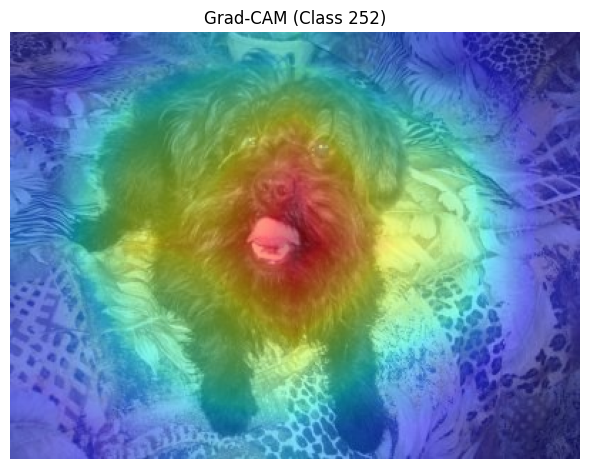

In [146]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# ======= Load & Preprocess Image =======
def load_image(image_path, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),  # Converts to [0,1]
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
    pil_image = Image.open(image_path).convert("RGB")
    tensor = transform(pil_image).unsqueeze(0).to(device)
    return tensor, pil_image

# ======= Custom Grad-CAM Class =======
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, input_tensor, class_idx=None):
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        loss = output[0, class_idx]
        self.model.zero_grad()
        loss.backward()

        pooled_grads = torch.mean(self.gradients, dim=(2, 3), keepdim=True)  # shape: [1, C, 1, 1]
        cam = torch.sum(self.activations * pooled_grads, dim=1).squeeze(0)  # [H, W]
        cam = F.relu(cam)
        cam -= cam.min()
        cam /= cam.max() + 1e-8
        return cam.cpu().numpy(), class_idx

# ======= Overlay CAM (No OpenCV) =======
def overlay_cam_on_image(pil_img, cam, title="Grad-CAM"):
    cam = Image.fromarray(np.uint8(cam * 255)).resize(pil_img.size, resample=Image.BILINEAR)
    cam = np.array(cam)

    plt.figure(figsize=(6, 6))
    plt.imshow(pil_img)
    plt.imshow(cam, cmap='jet', alpha=0.5)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ======= Custom ResNet Model (same as before) =======
# Insert your full BasicBlock, ResNet, and CustomResNet18 code here
# Keep `CustomResNet18(num_classes=1000)` and pretrained weight loading from earlier

# ======= MAIN SCRIPT =======
if __name__ == "__main__":
    from torchvision import models  # Only for loading pretrained weights
    import torchvision.models as tv_models

    # -- Define model again
    class BasicBlock(nn.Module):
        expansion = 1
        def __init__(self, in_channels, out_channels, stride=1, downsample=None):
            super(BasicBlock, self).__init__()
            self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)
            self.bn1 = nn.BatchNorm2d(out_channels)
            self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False)
            self.bn2 = nn.BatchNorm2d(out_channels)
            self.relu = nn.ReLU(inplace=True)
            self.downsample = downsample

        def forward(self, x):
            identity = x
            out = self.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            if self.downsample:
                identity = self.downsample(x)
            out += identity
            return self.relu(out)

    class ResNet(nn.Module):
        def __init__(self, block, layers, num_classes):
            super(ResNet, self).__init__()
            self.in_channels = 64
            self.conv1 = nn.Conv2d(3, 64, 7, 2, 3, bias=False)
            self.bn1 = nn.BatchNorm2d(64)
            self.relu = nn.ReLU(inplace=True)
            self.maxpool = nn.MaxPool2d(3, 2, 1)
            self.layer1 = self._make_layer(block, 64,  layers[0])
            self.layer2 = self._make_layer(block, 128, layers[1], 2)
            self.layer3 = self._make_layer(block, 256, layers[2], 2)
            self.layer4 = self._make_layer(block, 512, layers[3], 2)
            self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
            self.fc = nn.Linear(512 * block.expansion, num_classes)

        def _make_layer(self, block, out_channels, blocks, stride=1):
            downsample = None
            if stride != 1 or self.in_channels != out_channels * block.expansion:
                downsample = nn.Sequential(
                    nn.Conv2d(self.in_channels, out_channels * block.expansion, 1, stride, bias=False),
                    nn.BatchNorm2d(out_channels * block.expansion)
                )
            layers = [block(self.in_channels, out_channels, stride, downsample)]
            self.in_channels = out_channels * block.expansion
            for _ in range(1, blocks):
                layers.append(block(self.in_channels, out_channels))
            return nn.Sequential(*layers)

        def forward(self, x):
            x = self.relu(self.bn1(self.conv1(x)))
            x = self.maxpool(x)
            x = self.layer1(x)
            x = self.layer2(x)
            x = self.layer3(x)
            x = self.layer4(x)
            x = self.avgpool(x)
            x = torch.flatten(x, 1)
            x = self.fc(x)
            return x

    def CustomResNet18(num_classes):
        return ResNet(BasicBlock, [2, 2, 2, 2], num_classes)

    def load_pretrained_weights(model):
        pretrained = tv_models.resnet18(pretrained=True)
        model_dict = model.state_dict()
        pretrained_dict = {k: v for k, v in pretrained.state_dict().items()
                           if k in model_dict and v.shape == model_dict[k].shape}
        model_dict.update(pretrained_dict)
        model.load_state_dict(model_dict)
        return model

    # --- Set up everything ---
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_path = "/kaggle/input/ssd-3-l-dog-breed-classification/dog_breed_competition/test/affenpinscher/affenpinscher_00114.jpg"

    model = CustomResNet18(num_classes=1000).to(device)
    model = load_pretrained_weights(model)
    input_tensor, orig_pil = load_image(image_path, device)

    # --- Run Grad-CAM ---
    cam_layer = model.layer4  # Change to layer3/layer2/layer1 if needed
    gradcam = GradCAM(model, cam_layer)
    cam, pred_class = gradcam(input_tensor)

    overlay_cam_on_image(orig_pil, cam, f"Grad-CAM (Class {pred_class})")


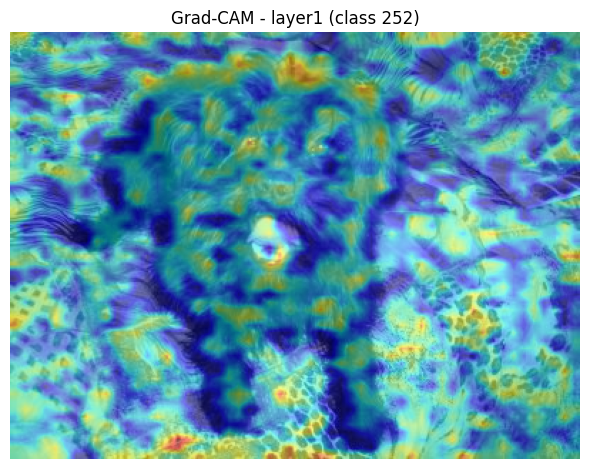

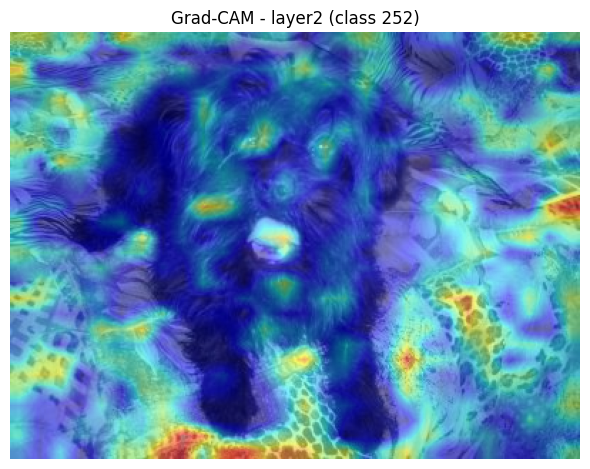

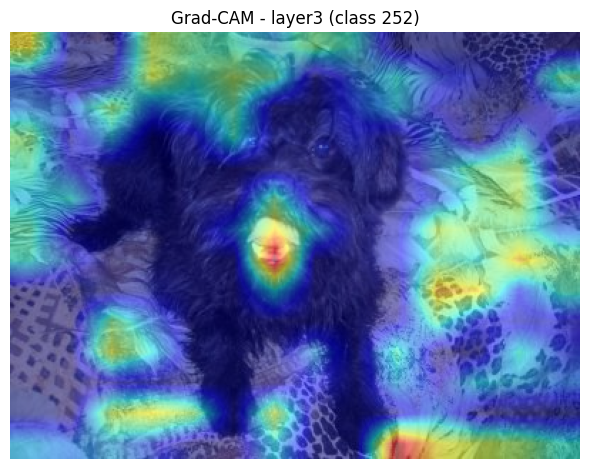

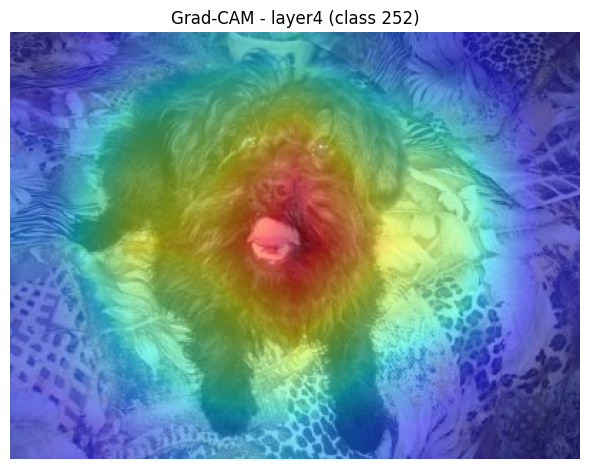

In [147]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_path = "/kaggle/input/ssd-3-l-dog-breed-classification/dog_breed_competition/test/affenpinscher/affenpinscher_00114.jpg"

    # Initialize model and load pretrained weights
    model = CustomResNet18(num_classes=1000).to(device)
    model = load_pretrained_weights(model)

    # Load image
    input_tensor, orig_pil = load_image(image_path, device)

    # Target layers
    target_layers = {
        "layer1": model.layer1,
        "layer2": model.layer2,
        "layer3": model.layer3,
        "layer4": model.layer4
    }

    # Loop over each layer
    for name, layer in target_layers.items():
        gradcam = GradCAM(model, target_layer=layer)
        cam, pred_class = gradcam(input_tensor)
        overlay_cam_on_image(orig_pil, cam, f"Grad-CAM - {name} (class {pred_class})")
